# Midterm Exam

In [2]:
import numpy as np
import cvxpy as cp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import warnings

plt.style.use('ggplot')

## Problem 1: Risk Parity Portfolio: Asset Allocation and Convex Optimization Analysis (20 points)

Risk Parity Portfolio (RPP) aims at equalizing the risk contribution from the invested assets in the global portfolio risk. Given a portfolio $\mathbf{w} \in \mathbb{R}^N$ and the return covariance matrix $\boldsymbol{\Sigma}$, the portfolio volatility is

$$  \sigma(\mathbf{w}) = \sqrt{\mathbf{w}^T\boldsymbol{\Sigma}\mathbf{w}}  . $$

The relative risk contribution (RRC) form the $i$ th asset is defined as

$$  \text{RRC}_i = \frac{w_i(\boldsymbol{\Sigma}\mathbf{w})_i}{\sigma^2(\mathbf{w})} = c_i , $$

where $\mathbf{c}$ is the given risk budget vector.

One RPP formulation is given by

$$  \begin{array}{ll} \underset{\mathbf{x}}{\mathsf{minimize}} & \frac{1}{2}\mathbf{x}^\top\boldsymbol{\Sigma}\mathbf{x} - \mathbf{c}^\top\text{log}(\mathbf{x})\\ \mathsf{subject~to} & \mathbf{x} \geq \mathbf{0}. \end{array}  $$

We can recover the portfolio by $\mathbf{w} =\mathbf{x}/(\mathbf{1}^\top\mathbf{x})$.

### (a)

**Prove** the problem is convex.

### Answer:

The objective function $\frac{1}{2}\mathbf{x}^\top\boldsymbol{\Sigma}\mathbf{x} - \mathbf{c}^\top\text{log}(\mathbf{x})$ is quadratic for $\boldsymbol{\Sigma} \geq 0$ and hence convex.

The constraint set $\mathbf{x} \geq \mathbf{0}$ is linear and hence convex.

### (b)

Use log-returns from `"2015-01-06"` to `"2015-05-29"` to find $\mathbf{w}$ and the corresponding relative risk contribution (RRC) for following $\mathbf{c}$: $$ \mathbf{c}_1 = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]^\top $$ $$ \mathbf{c}_2 = [0.2,0.2,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.1]^\top $$ $$ \mathbf{c}_3 = [0.15,0.25,0.1,0.1,0.02,0.02,0.02,0.02,0.02,0.3]^\top $$

In [3]:
# Load data
dataset_log_returns = pd.read_csv('dataset.csv', index_col=0, parse_dates=True)

# Get log-returns
log_returns = dataset_log_returns.loc['2015-01-06':'2015-05-29']
print(log_returns.head())

# Setup parameters
Sigma = log_returns.cov()
c1 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]).T
c2 = np.array([0.2, 0.2, 0.2, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1]).T
c3 = np.array([0.15, 0.25, 0.1, 0.1, 0.02, 0.02, 0.02, 0.02, 0.02, 0.3]).T
w_list = []
RRC_list = []

# Solve the optimization problem and find w and RRC for each c
for i, c in enumerate([c1, c2, c3]):
    # Solve the optimization problem
    x = cp.Variable(len(c))
    objective = cp.Minimize(0.5 * cp.quad_form(x, Sigma) - c.T @ cp.log(x))
    constraints = [x >= 0]
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Find w and RRC for each c using x
    w = x.value / np.sum(x.value)
    w_list.append(w)
    RRC = np.multiply(w, Sigma @ w) / (w.T @ Sigma @ w)
    RRC_list.append(RRC)

                TRIP       DVN       DTE       TGT      IDXX       IBM   
date                                                                     
2015-01-06 -0.038116 -0.020655 -0.001510 -0.000135  0.003207 -0.021802  \
2015-01-07  0.011786  0.004685  0.011787  0.037154  0.019966 -0.006557   
2015-01-08  0.033591  0.034870  0.004585  0.004679  0.007253  0.021502   
2015-01-09  0.017187  0.009814 -0.007461 -0.009117 -0.005585  0.004346   
2015-01-12 -0.042204 -0.021416 -0.000807  0.002613  0.008498 -0.016923   

                 IQV        VZ       OMC       UAL  
date                                                
2015-01-06 -0.023209  0.010042 -0.006593 -0.024020  
2015-01-07  0.012191 -0.006474  0.003369  0.014603  
2015-01-08  0.024452  0.021206  0.015618  0.016797  
2015-01-09 -0.006440 -0.008942 -0.008780 -0.019701  
2015-01-12  0.004072  0.006820 -0.005896  0.008838  


### (c)

**Plot** capital allocation distribution.

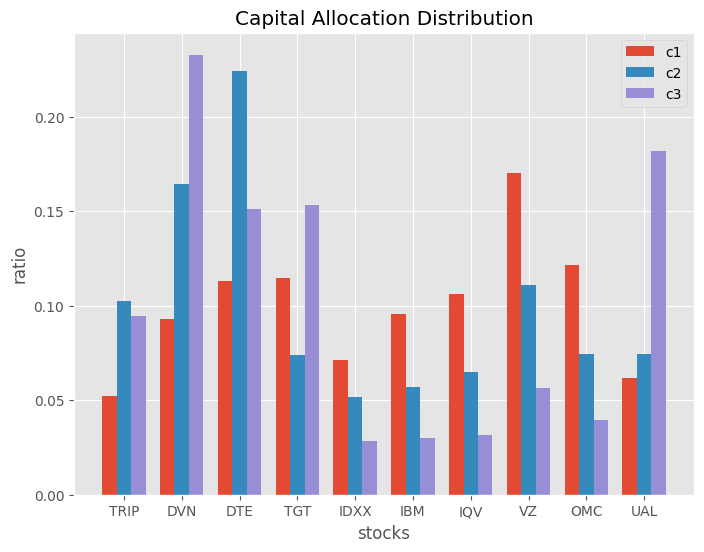

In [4]:
# Use w_list for capital allocation
w1 = w_list[0]
w2 = w_list[1]
w3 = w_list[2]

# Plot
width = 0.25
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar([x for x in range(len(w1))], w1, width=width, label='c1')
ax.bar([x+width for x in range(len(w2))], w2, width=width, label='c2')
ax.bar([x+width*2 for x in range(len(w3))], w3, width=width, label='c3')
plt.xticks([i+width for i in range(len(w1))], ['TRIP', 'DVN', 'DTE', 'TGT', 'IDXX', 'IBM', 'IQV', 'VZ', 'OMC', 'UAL'])
ax.set_xlabel('stocks')
ax.set_ylabel('ratio')
ax.set_title('Capital Allocation Distribution')
ax.legend()
plt.show()

### (d)

**Plot** RRC distribution.

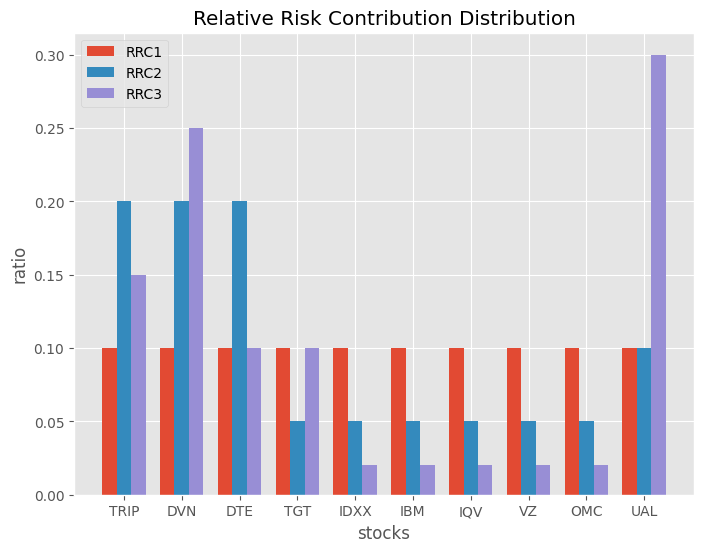

In [5]:
# Use w_list for capital allocation
RRC1 = RRC_list[0]
RRC2 = RRC_list[1]
RRC3 = RRC_list[2]

# Plot
width = 0.25
fig, ax = plt.subplots(figsize =(8, 6))
ax.bar([x for x in range(len(RRC1))], RRC1, width=width, label='RRC1')
ax.bar([x+width for x in range(len(RRC2))], RRC2, width=width, label='RRC2')
ax.bar([x+width*2 for x in range(len(RRC3))], RRC3, width=width, label='RRC3')
plt.xticks([i+width for i in range(len(RRC1))], ['TRIP', 'DVN', 'DTE', 'TGT', 'IDXX', 'IBM', 'IQV', 'VZ', 'OMC', 'UAL'])
ax.set_xlabel('stocks')
ax.set_ylabel('ratio')
ax.set_title('Relative Risk Contribution Distribution')
ax.legend()
plt.show()

## Question 2: Hierarchical Risk Parity: Portfolio Optimization through Clustering, Quasi-Diagonalization, and Recursive Bisection (25 points)

Hierarchical Risk Parity (HRP) combines the ideas of hierarchical clustering and inverse-variance allocation. The algorithm operates in three stages: tree clustering, quasi-diagonalization and recursive bisection. The code of stage 1 and 2 is provided in the attached file `"Q2code.py"`.

Stage 1 & 2 reorder the stocks. The figures[1](#fn1) show the correlation matrix before and after Stage 1 & 2. Values of correlation matrix are not changed. We just reorder the stocks so that the similar ones are next to each other and form a quasi-diagonal matrix.

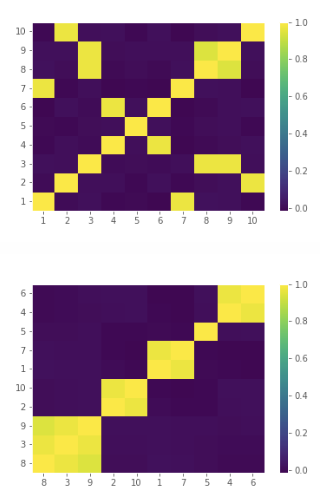

Stage 3 will be illustrated with a small example. Suppose we have 6 stocks and after Stage 1 & 2, the order of stocks are {“JNJ”, “PG”, “AMZN”, “JPM”, “V”, “FB”}. The steps of Stage 3 are as follows.

1.Initialization.

Set the list of stocks $L = \{1,2,3,4,5,6\}$. The numbers of $L$ correspond to the stocks.

Assign a unit weight to all items: $w_n = 1, n = 1,\dots,6$.

2.Bisection and weight allocation.

2.1 Bisect $L$ into two subsets $L_1 = \{1,2,3\}$ and $L_2 = \{4,5,6\}$, which correspond to {“JNJ”, “PG”, “AMZN”} and {“JPM”, “V”, “FB”} .

2.2 Calculate the following value for $L_i, i = 1,2$:
$$ \widetilde{V}_i = \widetilde{w}_i^\top V_i\widetilde{w}_i, $$
$$ \widetilde{w}_i = \text{diag}(V_i)^{-1}/\text{tr}(\text{diag}(V_i)^{-1}), $$
where $V_i$ is the covariance matrix of the $L_i$, $\text{diag}()$ is the diagonal operator and $\text{tr}()$ is the trace operator.

2.3 Compute the split factor:$$ \alpha = 1- \frac{\widetilde{V}_1}{\widetilde{V}_1 + \widetilde{V}_2}. $$

2.4 Re-scale allocations $w_n, n \in L_1$ by $\alpha$: $w_n = w_n \times \alpha, n= 1,2,3$.

Re-scale allocations $w_n, n \in L_2$ by $1 - \alpha$: $w_n = w_n \times (1 - \alpha), n= 4,5,6$.

3.Continue the bisection and weight allocation for $L_1$ and $L_2$ until all subsets have only 1 stock.  
In this example, we get subsets {1} and {2,3} from $L_1$. Then we apply step 2 to {1} and {2,3}, updating the allocations of stock {1} and {2,3}. After this round, {1} has only one stock, so no more bisection can be done. But {2,3} need to be bisected and update the allocations one more time.  
The same is for $L_2$.

### (a)

**Plot** the correlation matrix before and after the stage 1 & 2 with the code provided. (Use the function `"hrp_s12()"`.)

Please read the notes in the attached code file carefully. The `"hrp_s12()"`, `"hrp_s3()"` and `"getRecBipart()"` are three functions you need to focus. You do not need to read the code of other functions in detail.

### (b)

**Finish** the code for Stage 3 (the function `"getRecBipart()"`). Please read the notes in the attached code file carefully.

### (c)

**Print** the final weight for log-returns from `"2015-01-06"` to `"2015-05-29"` .

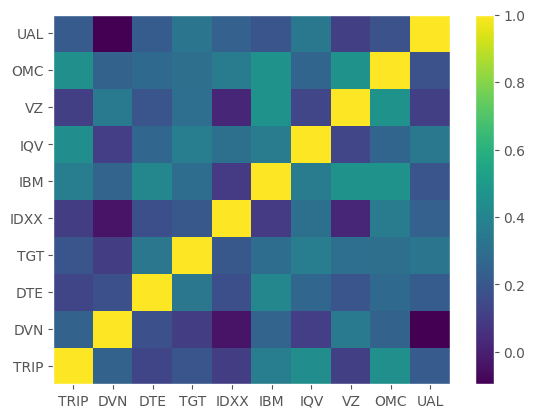

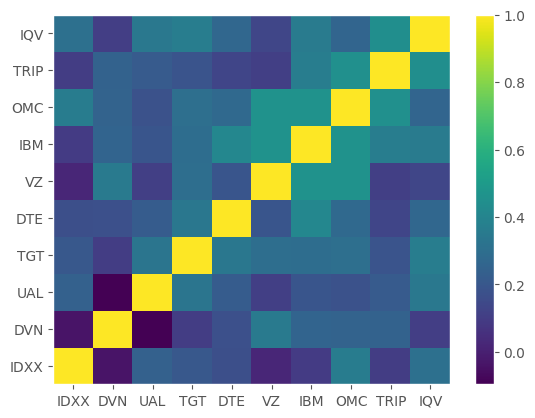

TRIP    0.016780
DVN     0.077009
DTE     0.109417
TGT     0.127480
IDXX    0.048225
IBM     0.100589
IQV     0.084897
VZ      0.219148
OMC     0.181932
UAL     0.034522
dtype: float64


In [6]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
dataset_log_returns = pd.read_csv('dataset.csv', index_col=0, parse_dates=True)

# The function you need to write.
# Input: cov: a dataframe containing the covariance matrix of stocks.
#        sortIx: a list containing the stocks names, ordered by the stage 1&2.
#        You can add any input argument if you need.
# Output: allocation weight. You can output any data type as long as you can use it properly in Q3.
def getRecBipart(cov, sortIx):
    
    # Recursion function
    def recursiveBisection(cov, left, right, w):

        # 2.Bisection and weight allocation
        # 2.1 Bisect L into two subsets
        if right - left == 1:
            return w
        else:
            mid = left + (right - left) // 2

            # 2.2 Calculate the parameters
            V1 = cov.iloc[left:mid, left:mid]
            V2 = cov.iloc[mid:right, mid:right][::-1].iloc[:, ::-1]
            V1_diag_inv = 1 / np.diag(V1)
            V2_diag_inv = 1 / np.diag(V2)
            w1 = V1_diag_inv / V1_diag_inv.sum()
            w2 = V2_diag_inv / V2_diag_inv.sum()
            V1_adj = w1.T @ V1 @ w1
            V2_adj = w2.T @ V2 @ w2

            # 2.3 Compute the split factor
            alpha = V1_adj / (V1_adj + V2_adj)

            # 2.4 Re-scale allocations
            w[left:mid] = w[left:mid] * (1 - alpha)
            w[mid:right] = w[mid:right] * alpha

            # 3.Continue the bisection and weight allocation
            w = recursiveBisection(cov, left, mid, w)
            w = recursiveBisection(cov, mid, right, w)
            return w
        
    cov = cov.loc[sortIx, sortIx]

    # 1. Initialization
    w = recursiveBisection(cov, 0, len(sortIx), np.ones(len(sortIx)))

    return pd.Series(w, index=sortIx)


# A sub function for the satge 1 and 2, called in the hrp_s12()
def getQuasiDiag(link):
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)
        df0 = sortIx[sortIx >= numItems]
        i = df0.index
        j = df0.values-numItems
        sortIx[i] = link[j, 0]
        df0 = pd.Series(link[j, 1], index = i + 1)
        sortIx = pd.concat([sortIx, df0])
        sortIx = sortIx.sort_index()
        sortIx.index = range(sortIx.shape[0])
    return sortIx.tolist()

# Transform the correlation matrix to a distance matrix
def correlDist(corr, n_stock):
    dist = ((1 - corr) / 2.) ** 0.5
    for i in range(n_stock):
        dist.iloc[i, i] = 0
    return dist

# Plot the heatmap of the correlation matrix
def plotCorrMatrix(path,corr, labels=None):
 #
    if labels is None: labels = []
    plt.pcolor(corr)
    plt.colorbar()
    plt.yticks(np.arange(0.5, corr.shape[0] + 0.5), labels)
    plt.xticks(np.arange(0.5, corr.shape[0] + 0.5), labels)
    plt.show()
    plt.clf();plt.close()
    return

# Function for Stage 1 and 2
def hrp_s12(cov, stock_namelist, ifplot=False):
    n_stock = len(stock_namelist)
 #1) compute and plot correlation matrix
    v = np.diag(np.sqrt(1 / np.diag(cov)))
    corr = np.dot(np.dot(v, cov), v)
    cov = pd.DataFrame(cov, columns=stock_namelist, index=stock_namelist)
    corr = pd.DataFrame(corr, columns=stock_namelist, index=stock_namelist)
    if (ifplot): plotCorrMatrix('HRP_corr0.png', corr, labels=corr.columns)
 #2) cluster
    dist = correlDist(corr,n_stock)
    link = sch.linkage(dist,'single')

    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist() # recover labels
    df0 = corr.loc[sortIx,sortIx] # reorder
    if (ifplot):
        plotCorrMatrix('HRP_corr1.png', df0, labels=df0.columns)
    return sortIx

def hrp_s3(cov, stock_namelist, sortIx):
    cov = pd.DataFrame(cov, columns=stock_namelist, index=stock_namelist)
    # Finish this function getRecBipart(cov,sortIx).
    hrp = getRecBipart(cov, sortIx)
    # Please print and check the "hrp" returned by the "getRecBipart(cov,sortIx)".
    # The order of stocks in "hrp" maybe follow the "sortIx", which is different from the "stock_namelist".
    # I suggest you to restore the order of "hrp" to "stock_namelist" here,
    # in order to avoid mistakes in Q3.
    # My "hrp" is a pandas.series, so this is what I do:
    hrp = hrp[stock_namelist]
    # It's OK if you want to finish this step in "getRecBipart()".
    # It's also Ok if you want to skip this step here and deal with this small order problem in Q3.
    return hrp

if __name__ == '__main__':
    stock_namelist = dataset_log_returns.columns.values.tolist()
    log_returns_1 = dataset_log_returns.loc['2015-01-06':'2015-05-29']
    Sigma = np.cov(log_returns_1.T)

    # Fill in the right argument to get the plots and new order of stocks:
    sortIx = hrp_s12(Sigma, stock_namelist, ifplot=True)
    # After finish the function of stage 3, call it and print the final weight:
    w_hrp = hrp_s3(Sigma, stock_namelist, sortIx)
    print(w_hrp)

## Question 3: Multi-Factor Models in Walk-Forward Process: Comparative Analysis of Risk Parity, Hierarchical Risk Parity, and Global Minimum Variance Portfolios (55 points)

### (a)

Consider a 3-factor model. Find the $\boldsymbol{\alpha}$ and $\boldsymbol{\beta}$ for the model with the factors provided in the attached file `"factors.csv"`. Now we have the three explicit factors in matrix $\mathbf{F}$ and want to fit the model $$ \mathbf{X}^\top = \boldsymbol{\alpha}\mathbf{1}^\top + \mathbf{BF}^\top + \mathbf{E} $$ where the loadings are a matrix of betas. Use all data in `"dataset.csv"`.  
**Print** the values of $\boldsymbol{\alpha}$ and $\boldsymbol{\beta}$.

**Find** the five stocks with the highest $\alpha$.

In [7]:
# Find alpha and beta using the closed form solution
X = dataset_log_returns

factors = pd.read_csv('factors.csv', index_col=0, parse_dates=True)
F_ = np.column_stack([np.ones(len(factors)), factors])

Gamma_mat = np.linalg.solve(F_.T @ F_, F_.T @ X)
Gamma = pd.DataFrame(Gamma_mat.T, columns = ["alpha", "beta1", "beta2", "beta3"])
print(Gamma)

# Sort alpha and return the corresponding stocks
stocks = dataset_log_returns.columns.tolist()
Gamma.index = stocks
Gamma = Gamma.sort_values(by="alpha" , ascending=False)
five_stocks = Gamma.iloc[0:5,].index.values.tolist()
print("Five stocks:", five_stocks)

      alpha     beta1     beta2     beta3
0 -0.000662  1.153965  0.333557 -0.505423
1 -0.001180  1.654657  0.512218  1.585148
2  0.000251  0.332389 -0.475470 -0.139733
3 -0.000190  0.718524  0.243826  0.191927
4  0.000542  1.010351 -0.022946 -0.843441
5 -0.000466  0.950325 -0.197328  0.129400
6  0.000308  0.919946  0.159220 -0.639448
7  0.000185  0.586535 -0.379375  0.259116
8 -0.000135  0.781819 -0.034139  0.154962
9 -0.000069  1.144979  0.488025  0.055417
Five stocks: ['IDXX', 'IQV', 'DTE', 'VZ', 'UAL']


### (b)

With the five stocks you find in Q3.a, we now implement walk-forward (WF) process based on rolling windows. We divide the 1000 days into 10 windows of length 100 denoted as $[T_0,T_1,\dots, T_9]$ and in each $T_n, n = 1,\dots,9$ we will stick to a certain portfolio $w_n, n = 1,\dots,9$, calculated based on the data only in $T_{n-1}$.

**Apply** the RPP (P1), HRP (P2) and GMVP portfolio. For RPP portfolio, use the budget vector [0.2, 0.2, 0.2, 0.2, 0.2].  

**Create** grouped bar charts of the allocation for each portfolio.

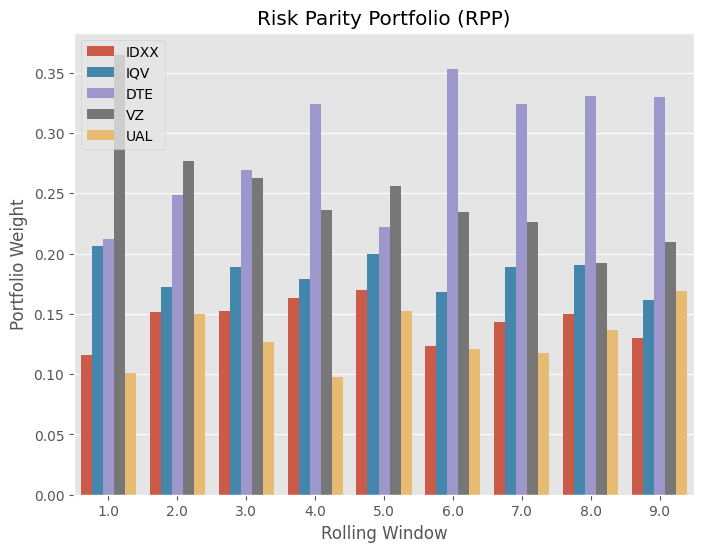

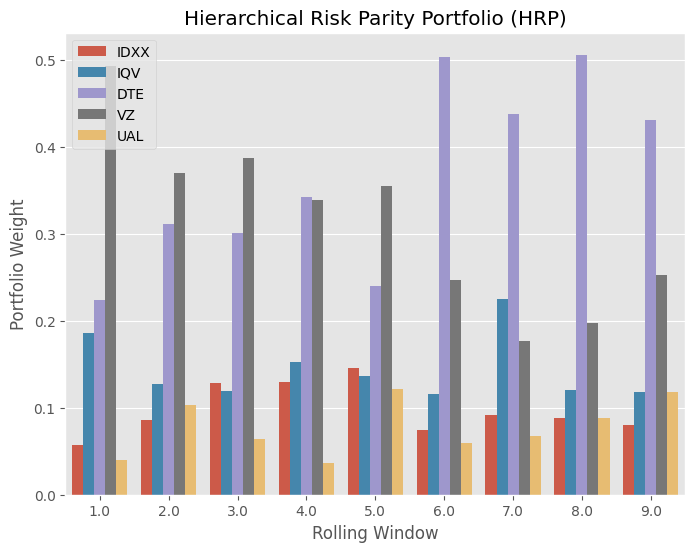

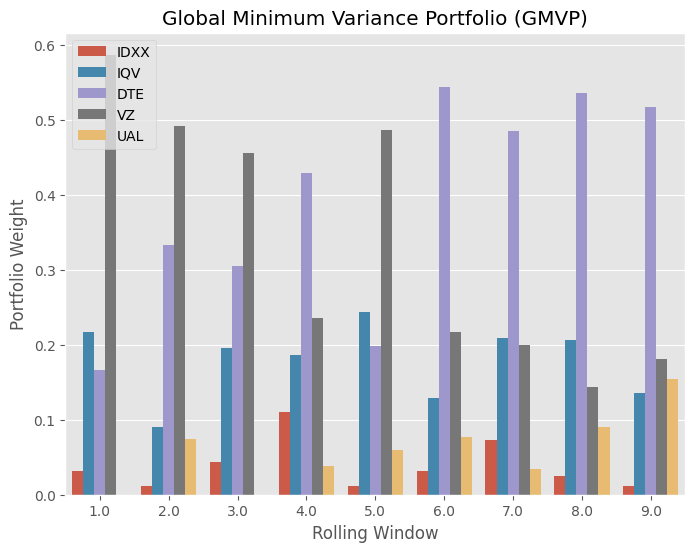

In [8]:
# Initialization
five_log_returns = dataset_log_returns.loc[:, five_stocks]
n_stock = len(five_stocks)
n_rolling = 9
rolling_window = 100
portfolio_matrix_RPP = np.zeros((n_stock, n_rolling))
portfolio_matrix_HRP = np.zeros((n_stock, n_rolling))
portfolio_matrix_GMVP = np.zeros((n_stock, n_rolling))

# Risk Parity Portfolio
def RPP(cov):
    c = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
    x = cp.Variable(np.shape(cov)[0])
    objective = cp.Minimize(0.5 * cp.quad_form(x, cov) - c @ cp.log(x))
    constraints = [x >= 0]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    w = x.value / np.sum(x.value)
    return w

# Hirarchical Risk Parity Portfolio
def HRP(cov, stock_namelist):
  sortIx = hrp_s12(cov, stock_namelist)
  w_hrp = hrp_s3(cov, stock_namelist, sortIx)
  return w_hrp

# Global Minimum Variance Portfolio
def GMVP(cov):
    x = cp.Variable(len(cov))
    objective = cp.Minimize(cp.quad_form(x, cov))
    constraints = [x >= 0, cp.sum(x) == 1]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    w = x.value / np.sum(x.value)
    return w

# Apply portfolios and store weights
for i in range(n_rolling):
    data_in_window = five_log_returns.iloc[(i * rolling_window):((i+1) * rolling_window), ]
    cov = np.cov(data_in_window.T)
    w_RPP = RPP(cov)
    w_HRP = HRP(cov, five_stocks)
    w_GMVP = GMVP(cov)
    portfolio_matrix_RPP[:, i] = w_RPP
    portfolio_matrix_HRP[:, i] = w_HRP
    portfolio_matrix_GMVP[:, i] = w_GMVP

def plot_portfolio_weights(weights, title):
    df = pd.DataFrame(np.c_[weights.T, range(1, n_rolling + 1)])
    df.columns = five_stocks + ["Rolling"]
    df_melted = df.melt(id_vars=['Rolling'], var_name='Stock', value_name='Weight')
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x='Rolling', y='Weight', hue='Stock', data=df_melted)
    plt.title(title)
    plt.xlabel("Rolling Window")
    plt.ylabel("Portfolio Weight")
    ax.legend(loc = "upper left")
    plt.show()

plot_portfolio_weights(portfolio_matrix_RPP, "Risk Parity Portfolio (RPP)")
plot_portfolio_weights(portfolio_matrix_HRP, "Hierarchical Risk Parity Portfolio (HRP)")
plot_portfolio_weights(portfolio_matrix_GMVP, "Global Minimum Variance Portfolio (GMVP)")

### (c)

**Compute** the simple return (not compounded) in this backtest.

**Plot** the return path.

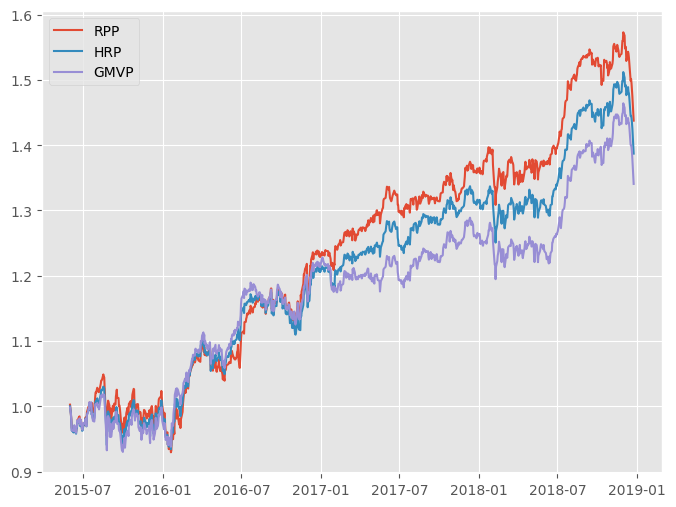

In [9]:
# Compute daily portfolio weights
daily_weight_RPP = np.repeat(portfolio_matrix_RPP, rolling_window, axis=1)
daily_weight_HRP = np.repeat(portfolio_matrix_HRP, rolling_window, axis=1)
daily_weight_GMVP = np.repeat(portfolio_matrix_GMVP, rolling_window, axis=1)

# Compute the simple returns
X_log = five_log_returns.values[rolling_window:, 0:n_stock]
return_RPP = (X_log @ daily_weight_RPP).diagonal()
return_HRP = (X_log @ daily_weight_HRP).diagonal()
return_GMVP = (X_log @ daily_weight_GMVP).diagonal()

# Compute cumulative returns
total_return_RPP = 1 + np.cumsum(return_RPP)
total_return_HRP = 1 + np.cumsum(return_HRP)
total_return_GMVP = 1 + np.cumsum(return_GMVP)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
dates_rolling = pd.to_datetime(five_log_returns.index[rolling_window:])
ax.plot(dates_rolling, total_return_RPP, label="RPP")
ax.plot(dates_rolling, total_return_HRP, label="HRP")
ax.plot(dates_rolling, total_return_GMVP, label="GMVP")
plt.legend()
plt.show()

### (d)

**Redo** the Q3.c with the shrinkage estimator as follows: $$ \hat{\boldsymbol\Sigma}^{\text{SH}} = (1-\rho)\hat{\boldsymbol\Sigma} + \rho \mathbf{T}, $$ where $\rho=0.3$, $\hat{\boldsymbol{\Sigma}}$ denotes the sample covariance matrix, and the target is $\mathbf{T} = \frac{1}{N} \text{Tr}(\hat{\boldsymbol{\Sigma}}) \times \mathbf{I}$ (scaled identity).

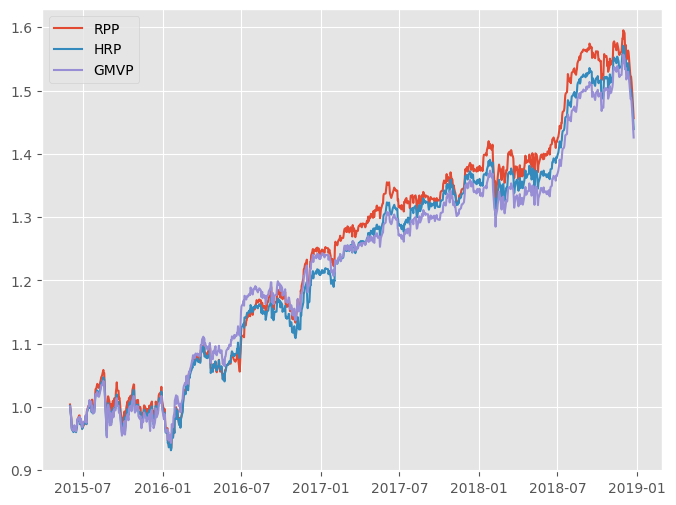

In [10]:
# Initialization
portfolio_matrix_rrps = np.zeros((n_stock, n_rolling))
portfolio_matrix_hrps = np.zeros((n_stock, n_rolling))
portfolio_matrix_gmvps = np.zeros((n_stock, n_rolling))

# Apply portfolios and store weights
for i in range(n_rolling):
    data_in_window = five_log_returns.iloc[(i * rolling_window):((i+1) * rolling_window), ]
    Sigma = np.cov(data_in_window.T)

    # Shrinkage estimator
    rho = 0.3
    T = np.trace(Sigma) / n_stock * np.identity(n_stock)
    Sigma_SH = (1 - rho) * Sigma + rho * T

    w_RPP = RPP(Sigma_SH)
    w_HRP = HRP(Sigma_SH, five_stocks)
    w_GMVP = GMVP(Sigma_SH)
    portfolio_matrix_RPP[:, i] = w_RPP
    portfolio_matrix_HRP[:, i] = w_HRP
    portfolio_matrix_GMVP[:, i] = w_GMVP

# Redo Q3c
# Compute daily portfolio weights
daily_weight_RPP = np.repeat(portfolio_matrix_RPP, rolling_window, axis=1)
daily_weight_HRP = np.repeat(portfolio_matrix_HRP, rolling_window, axis=1)
daily_weight_GMVP = np.repeat(portfolio_matrix_GMVP, rolling_window, axis=1)

# Compute the simple returns
X_log = five_log_returns.values[rolling_window:, 0:n_stock]
return_RPP = (X_log @ daily_weight_RPP).diagonal()
return_HRP = (X_log @ daily_weight_HRP).diagonal()
return_GMVP = (X_log @ daily_weight_GMVP).diagonal()

# Compute cumulative returns
total_return_RPP = 1 + np.cumsum(return_RPP)
total_return_HRP = 1 + np.cumsum(return_HRP)
total_return_GMVP = 1 + np.cumsum(return_GMVP)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
dates_rolling = pd.to_datetime(five_log_returns.index[rolling_window:])
ax.plot(dates_rolling, total_return_RPP, label="RPP")
ax.plot(dates_rolling, total_return_HRP, label="HRP")
ax.plot(dates_rolling, total_return_GMVP, label="GMVP")
plt.legend()
plt.show()